In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as c

In [0]:
RANDOM_SEED = 42

In [0]:
random.seed(RANDOM_SEED)

In [0]:
maze = np.array([
  [0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
  [0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
  [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
  [1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
  [0, 0, 1, 1, 0, 0, 0, 0, 1, 1],
])

maze2 = np.array([
    [0, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 0]
])

In [0]:
class QAgent:
  
  def __init__(self, maze, goal, learning_rate = 0.7):
    self.maze = maze
    self.goal = goal
    self.Q = np.zeros((self.maze.shape[0] * self.maze.shape[1], 4))    
    self.R = np.zeros(self.Q.shape)
    self.learning_rate = learning_rate
    
    self.moves = np.array([
      [0, -1],
      [1, 0],
      [0, 1],
      [-1, 0],
    ])
    
    self._generate_reward_matrix(self.maze, self.goal)    
    
  def train(self, gamma=0.9, episodes_count=1000):
    for i in range(episodes_count):
      self.state = -1
      
      while (not self._is_valid(self._get_2d_index(self.state))):
          self.state = self._get_1d_index([random.randint(0, self.maze.shape[0] - 1), random.randint(0, self.maze.shape[1] - 1)])
            
      while (self.state != self.goal):
        possible_next_states = self._get_valid_states(self.state)
        next_state, next_move = possible_next_states[random.randint(0, len(possible_next_states) - 1)]
                
        possible_next_next_states = self._get_valid_states(next_state)
        max_q = float('-inf')
        max_q = np.max(np.array([self.Q[next_state][next_next[1]] for next_next in possible_next_next_states]))

        q_state = self.R[self.state][next_move] + gamma * max_q
        self.Q[self.state][next_move] = ((1 - self.learning_rate) * self.Q[self.state][next_move]) + (self.learning_rate * q_state)
        self.state = next_state

      print('Episode #{}: Goal Reached!'.format(i + 1))
    
    print('Done')
    
  def solve(self, initial_state):
    self.state = initial_state
    
    path = []
    
    while self.state != self.goal:
      path.append(self._get_2d_index(self.state))
            
      possible_next_states = self._get_valid_states(self.state)
      max_state, max_direction = possible_next_states[np.argmax(np.array([self.Q[self.state, state[1]] for state in possible_next_states]))]
      
      self.state = max_state
    
    path.append(self._get_2d_index(self.goal))
    self.print_path(path)
    
    return path
  
  def print_path(self, path):
    initial = path[0]
    goal = path[len(path) - 1]
    
    matrix = self.maze.copy()
    
    for i in range(1, len(path) - 1):
        tile = path[i]
        
        matrix[tile[0], tile[1]] = 2
    
    matrix[initial[0], initial[1]] = 3
    matrix[goal[0], goal[1]] = 4
    
    cmap = c.ListedColormap(['b','k','y', 'w', 'g'])
    
    plt.pcolormesh(matrix, cmap=cmap)
    plt.axes().set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.axes().invert_yaxis()
    plt.show()
    
  def _get_valid_states(self, state):
    valid = []

    for direction in range(len(self.moves)):
      next = self._get_2d_index(state) + self.moves[direction]
      next_state = self._get_1d_index(next)
      
      if self._is_valid(next):
        valid.append((next_state, direction))

    return valid
  
  def _is_valid(self, index_2d):    
    if self._is_outside(index_2d) or self.maze[index_2d[0], index_2d[1]] == 1:
      return False

    return True
  
  def _is_outside(self, index_2d):
    x, y = self.maze.shape
    return index_2d[0] < 0 or index_2d[0] >= x or index_2d[1] < 0 or index_2d[1] >= y
    
  def _get_1d_index(self, pair):
    return pair[1] + (pair[0] * self.maze.shape[1])
  
  def _get_2d_index(self, index):    
    if (index < 0):
      return np.array([-1, -1])
    
    rows, cols = self.maze.shape
    return np.array([int(np.floor(index / cols)), index % cols])
  
  def _generate_reward_matrix(self, maze, goal):
    rows, cols = maze.shape
    
    for state in range(rows * cols):
      for move in range(len(self.moves)):
        current = self._get_2d_index(state)
        reward = -10
        
        next = current + self.moves[move]
        next_state = self._get_1d_index(next)
        
        if self._is_valid(next):
          reward = -1
          
          if (next_state == self.goal):
            reward = 10
        
        if not self._is_outside(next):          
          self.R[state][move] = reward



In [6]:
agent = QAgent(maze, 39)
agent.train(episodes_count=100)

Episode #1: Goal Reached!
Episode #2: Goal Reached!
Episode #3: Goal Reached!
Episode #4: Goal Reached!
Episode #5: Goal Reached!
Episode #6: Goal Reached!
Episode #7: Goal Reached!
Episode #8: Goal Reached!
Episode #9: Goal Reached!
Episode #10: Goal Reached!
Episode #11: Goal Reached!
Episode #12: Goal Reached!
Episode #13: Goal Reached!
Episode #14: Goal Reached!
Episode #15: Goal Reached!
Episode #16: Goal Reached!
Episode #17: Goal Reached!
Episode #18: Goal Reached!
Episode #19: Goal Reached!
Episode #20: Goal Reached!
Episode #21: Goal Reached!
Episode #22: Goal Reached!
Episode #23: Goal Reached!
Episode #24: Goal Reached!
Episode #25: Goal Reached!
Episode #26: Goal Reached!
Episode #27: Goal Reached!
Episode #28: Goal Reached!
Episode #29: Goal Reached!
Episode #30: Goal Reached!
Episode #31: Goal Reached!
Episode #32: Goal Reached!
Episode #33: Goal Reached!
Episode #34: Goal Reached!
Episode #35: Goal Reached!
Episode #36: Goal Reached!
Episode #37: Goal Reached!
Episode #3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


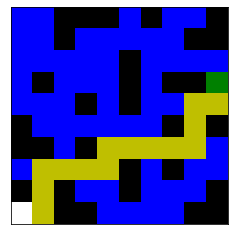

[array([9, 0]), array([9, 1]), array([8, 1]), array([7, 1]), array([7, 2]), array([7, 3]), array([7, 4]), array([6, 4]), array([6, 5]), array([6, 6]), array([6, 7]), array([6, 8]), array([5, 8]), array([4, 8]), array([4, 9]), array([3, 9])]


In [7]:
print(agent.solve(90))